### EfficientNets

In [1]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir("C:/efficient_net")

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir("C:/efficient_net" + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str("C:/efficient_net" + '/' +item) + '/' + room))
    #print(class_labels[:5])
    
    
# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

C:\Users\rashm\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rashm\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\rashm\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\rashm\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


['Dairy Milk', 'earphone', 'shampoo']
Types of classes labels found:  3
       Labels                                   image
0  Dairy Milk  C:/efficient_net/Dairy Milk/000001.jpg
1  Dairy Milk  C:/efficient_net/Dairy Milk/000002.jpg
2  Dairy Milk  C:/efficient_net/Dairy Milk/000003.jpg
3  Dairy Milk  C:/efficient_net/Dairy Milk/000004.jpg
4  Dairy Milk  C:/efficient_net/Dairy Milk/000005.jpg
      Labels                                image
145  shampoo  C:/efficient_net/shampoo/000046.jpg
146  shampoo  C:/efficient_net/shampoo/000047.jpg
147  shampoo  C:/efficient_net/shampoo/000048.png
148  shampoo  C:/efficient_net/shampoo/000049.png
149  shampoo  C:/efficient_net/shampoo/000050.jpg


In [2]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  150
shampoo       50
Dairy Milk    50
earphone      50
Name: Labels, dtype: int64


In [3]:
import cv2
path = "C:/efficient_net/"
dataset_path = os.listdir("C:/efficient_net")

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [4]:

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(150, 224, 224, 3)

In [5]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk'
 'Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk'
 'Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk'
 'Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk'
 'Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk'
 'Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk'
 'Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk'
 'Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk'
 'Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk'
 'Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk' 'Dairy Milk'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'ear

In [6]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0

In [7]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(142, 224, 224, 3)
(142, 3)
(8, 224, 224, 3)
(8, 3)


In [8]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os


NUM_CLASSES = 3
IMG_SIZE = 224

In [9]:
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    #x = img_augmentation(inputs)
    x = inputs
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [10]:
model = build_model(num_classes=NUM_CLASSES)

16705208/16705208 [==============================] - 5s 0us/step


In [11]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


#plot_hist(hist)

Epoch 1/30
5/5 - 8s - loss: 1.9186 - accuracy: 0.2817 - 8s/epoch - 2s/step
Epoch 2/30
5/5 - 4s - loss: 1.6381 - accuracy: 0.3028 - 4s/epoch - 880ms/step
Epoch 3/30
5/5 - 5s - loss: 1.7492 - accuracy: 0.3028 - 5s/epoch - 930ms/step
Epoch 4/30
5/5 - 4s - loss: 1.4712 - accuracy: 0.4085 - 4s/epoch - 894ms/step
Epoch 5/30
5/5 - 5s - loss: 1.5480 - accuracy: 0.3803 - 5s/epoch - 937ms/step
Epoch 6/30
5/5 - 5s - loss: 1.5623 - accuracy: 0.3451 - 5s/epoch - 919ms/step
Epoch 7/30
5/5 - 5s - loss: 1.6536 - accuracy: 0.3310 - 5s/epoch - 995ms/step
Epoch 8/30
5/5 - 5s - loss: 1.5716 - accuracy: 0.3873 - 5s/epoch - 980ms/step
Epoch 9/30
5/5 - 5s - loss: 1.5518 - accuracy: 0.3592 - 5s/epoch - 945ms/step
Epoch 10/30
5/5 - 5s - loss: 1.2738 - accuracy: 0.4366 - 5s/epoch - 970ms/step
Epoch 11/30
5/5 - 6s - loss: 1.3582 - accuracy: 0.4225 - 6s/epoch - 1s/step
Epoch 12/30
5/5 - 5s - loss: 1.4027 - accuracy: 0.4225 - 5s/epoch - 1s/step
Epoch 13/30
5/5 - 5s - loss: 1.3873 - accuracy: 0.4085 - 5s/epoch - 1s

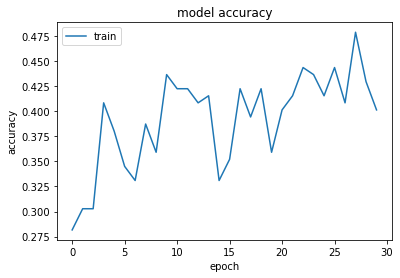

In [12]:
epochs = 30 
hist = model.fit(train_x, train_y, epochs=epochs, verbose=2)
plot_hist(hist)

In [13]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 1s 1s/step - loss: 1.3639 - accuracy: 0.1250
Loss = 1.363903522491455
Test Accuracy = 0.125


Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 1s 861ms/step
predicted class:  [[0.4539797  0.23157722 0.31444308]]


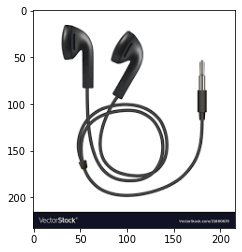

In [14]:
img_path = "D:/Down/ear.png"


img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)



preds=model.predict(x)
print("predicted class: ", preds ) 

In [20]:
a=preds.max()

0.4539797

In [ ]:
import pandas as pd

# per unit cost for each item 
price = {'earphone,' : 5000 ,
         'shampoo,' : 1450,
         'Dairy Milk,': 100,
         }